<div style="text-align: right">Data Science Eng Methods and Tools</div>
<div style="text-align: right">Zhe Xu | 21 February 2019</div>

Data science and analysis for NBA teams 
-----------------------


Import various python libraries and apis assisting data manipulation, analysis and prediction

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.optimize import fmin
sns.set_context('notebook')
import pymc3 as pm
from scipy import stats
from statsmodels.formula.api import ols
RANDOM_SEED = 20190220

### Data mining and inspections

<br>

Use pandas to read csv file for advanced NBA team data and traditional team data, which are stored as dataframe

In [2]:
teamstats = pd.read_csv('data/teamstats2019.csv', parse_dates=True, index_col=0)
teamstats

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
id,,,,,,,,,,,,,,,,,,,,,
1,Milwaukee Bucks,57,43,14,0.754,48.2,116.9,43.3,90.2,48.0,...,39.8,48.8,26.2,14.2,7.8,5.9,4.8,20.0,20.2,9.8
2,Toronto Raptors,59,43,16,0.729,48.4,114.3,42.2,89.7,47.0,...,34.9,45.2,24.7,13.9,8.5,5.3,4.7,21.4,20.9,5.6
3,Golden State Warriors,57,41,16,0.719,48.4,118.8,44.2,89.9,49.1,...,36.3,46.4,29.5,13.9,7.5,6.5,3.5,21.6,20.2,7.1
4,Denver Nuggets,57,39,18,0.684,48.2,112.0,42.5,90.1,47.2,...,34.2,46.3,27.6,13.4,7.7,4.5,5.1,20.0,20.5,4.9
5,Indiana Pacers,58,38,20,0.655,48.1,108.1,41.8,87.4,47.8,...,34.1,43.3,26.1,13.9,8.8,5.0,5.1,19.2,19.7,5.2
6,Oklahoma City Thunder,57,37,20,0.649,48.3,115.4,43.1,93.2,46.2,...,35.8,47.9,23.4,14.2,10.2,5.3,5.1,22.3,22.6,5.2
7,Boston Celtics,58,37,21,0.638,48.3,113.0,42.1,90.5,46.5,...,34.9,45.1,26.4,13.2,8.8,5.7,3.9,20.6,19.7,6.4
8,Philadelphia 76ers,58,37,21,0.638,48.4,115.9,41.5,87.3,47.5,...,36.5,47.0,27.4,15.5,7.7,5.5,4.0,21.9,22.8,3.7
9,Portland Trail Blazers,57,34,23,0.596,48.4,113.3,41.7,90.0,46.4,...,36.3,47.6,22.8,14.0,6.6,5.0,5.4,20.5,20.6,3.0


In [3]:
advteam2019 = pd.read_csv('data/teamadvancedstats2019.csv', parse_dates=True, index_col=0)
advteam2019

,TEAM,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
id,,,,,,,,,,,,,,,,,,,
1,Milwaukee Bucks,57,43,14,2746.0,113.0,103.5,9.6,60.5,1.84,18.5,24.8,75.8,51.6,13.8,55.2,58.4,103.10,55.8
2,Toronto Raptors,59,43,16,2857.0,112.4,107.3,5.2,58.5,1.77,17.7,28.1,71.9,50.4,13.7,53.4,57.3,100.62,52.9
3,Golden State Warriors,57,41,16,2756.0,116.0,109.2,6.9,66.7,2.12,20.4,26.8,72.8,51.0,13.6,56.3,59.7,101.63,55.1
4,Denver Nuggets,57,39,18,2746.0,113.4,108.4,5.0,64.9,2.05,19.4,31.5,74.5,52.8,13.6,53.3,56.3,98.41,52.8
5,Indiana Pacers,58,38,20,2789.0,109.3,104.1,5.2,62.5,1.88,19.0,27.4,73.1,50.6,14.0,53.2,56.2,98.69,53.7
6,Boston Celtics,58,37,21,2804.0,111.9,105.7,6.2,62.8,2.01,18.8,26.6,73.0,50.0,13.0,53.7,57.1,100.22,54.2
7,Oklahoma City Thunder,57,37,20,2751.0,110.4,105.2,5.1,54.3,1.65,16.3,29.6,73.4,50.9,13.6,52.1,55.2,104.06,51.9
8,Philadelphia 76ers,58,37,21,2809.0,111.8,108.4,3.5,66.1,1.76,19.0,27.3,73.7,51.4,15.0,54.0,58.2,102.66,53.5
9,Portland Trail Blazers,57,34,23,2756.0,112.4,109.4,3.0,54.7,1.63,16.5,29.6,73.9,52.0,13.9,52.6,56.6,100.10,51.5


<br>

Given the knowledge that the box plot is a very useful tool when showing a statistical distribution, and especially when you want to visualize frequency distribution by categories

* From the perspective of NBA fans and analysts, it is statistically believe that teams are shooting much more threes and favor offense in the todays NBA games, especially after the Golden State Warriors won their first title in recent years who has been famous of shooting from long range. Therefore, it might be interesting to inspect what the trend of three point attempts `3PA` looks like, and see how it would relate to team winning percentage `WIN%`

<br>

* Use `pd.cut()` to  segment and sort regular team stats, specifically three points attempts `3PA` values into separate bins.

<br>


* As expected, three pointers are heavily emphasized in todays NBA games, and it does positively related to winning percentage `WIN%`

<br>


* Additional interesting observation, even though there is no doubt that shooting more threes, from the analytical perspective, will greating assist in winning the game, there are many other factors weigh in like defense related attribuets. As an example, the "lonely" team shooting the most three pointers(40-45_3PA) is the Houston Rockets. They did not win as much game as expected because of many possible reasons: poor rebound, players' heights(lengths), effectiveness etc. 


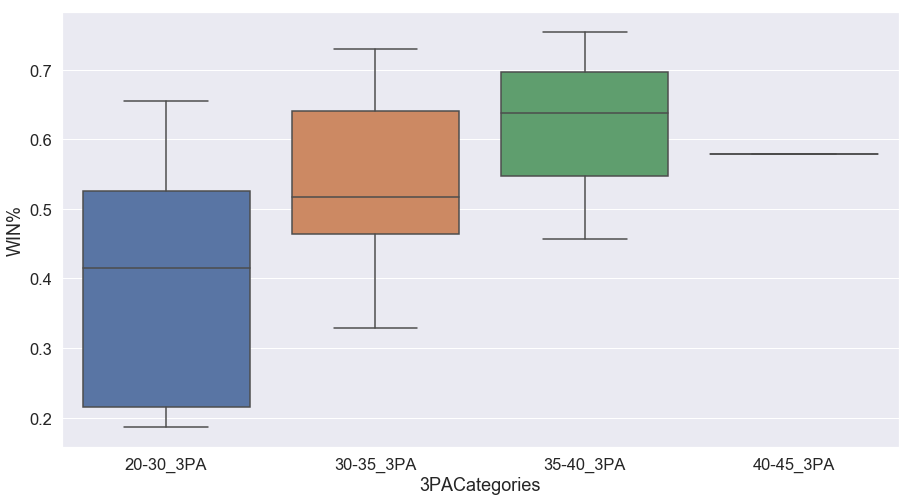

In [52]:


reg_teamstats = teamstats.copy()
reg_teamstats['3PACategories'] = pd.cut(reg_teamstats['3PA'], [20,30,35,40,45], labels = ['20-30_3PA','30-35_3PA','35-40_3PA', '40-45_3PA'])
plt.figure(figsize=(15,8))
sns.boxplot(x="3PACategories", y="WIN%", data=reg_teamstats)



### Moving on... Analyze what and how key attributes are playing important roles in winning the NBA game:

<br>


Use `heatmap` provided by seaborn to visualize data of correlation that is calcualted by `pandas.corr()` method to check the correlation between `WIN%` and other attributes in traditional and advanced NBA stats
* There are some attributes have incredibly high correlation to `WIN%` and `W` like `WIN`, but those are trivial attributes 
* Therefore, logically field goal percentage `FG%`, defensive rebound `DREB`, plus/minus value `+/-` are the technical attributes that are more related to the gameplay of NBA teams. The other reason these attributes are chosen is because they are more straight forward and construct most <b>direct feedback</b> from the game

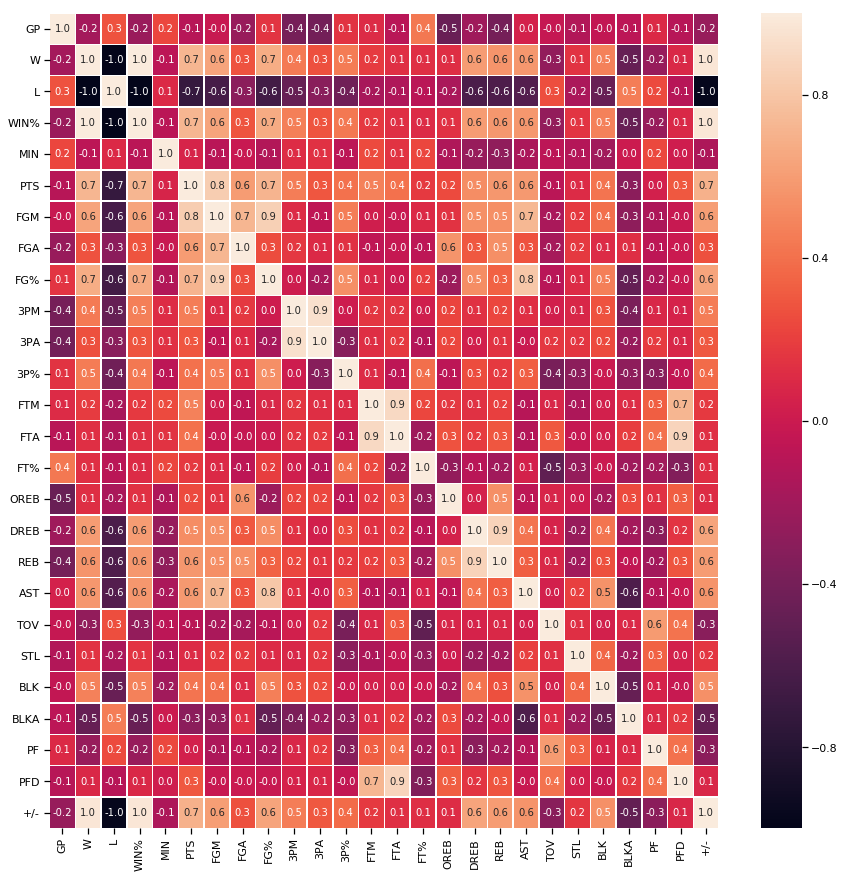

In [5]:

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(teamstats.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Slicing the overall, larger heatmap into a 7 x 7 sub-heatmap and obtain the portion we care about in this analysis:

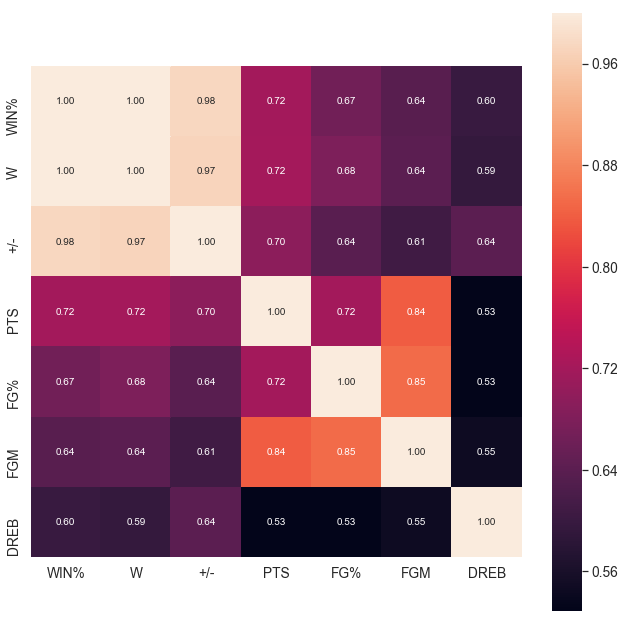

In [13]:
k = 7 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = teamstats.corr().nlargest(k, 'WIN%')['WIN%'].index
cm = np.corrcoef(teamstats[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Apply the same methods with advance NBA data: ```advteam2019```:

Obtian and observe the correlations between several attributes that are relatively closely related to```W```, obviously

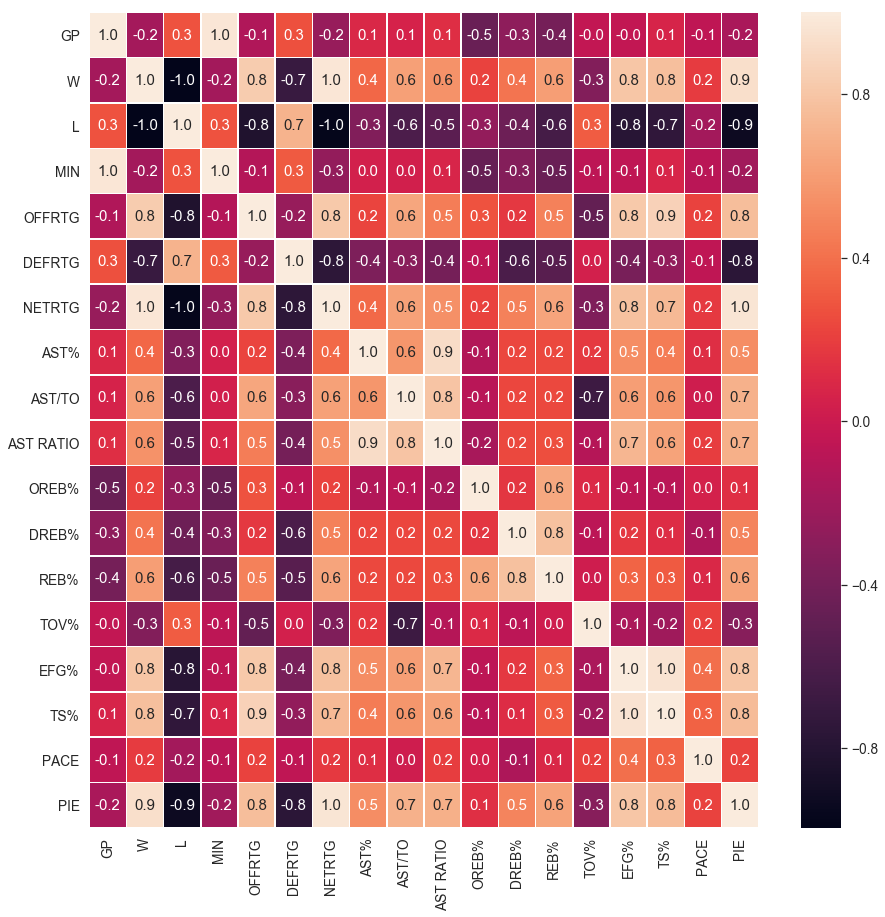

In [12]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(advteam2019.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

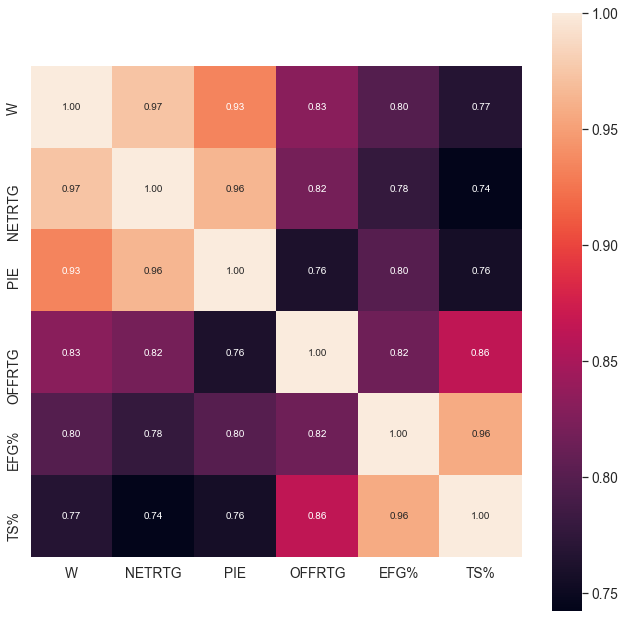

In [14]:
k = 6 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = advteam2019.corr().nlargest(k, 'W')['W'].index
cm = np.corrcoef(advteam2019[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

With the same train of thoughts in mind, extract meaningful attributes from advanced NBA team data: defense rating (DEFRTG), offense rating (OFFRTG), effective field goal percentage (EFG%).
    * DEFRTG: The number of points allowed per 100 possessions by a team.
    * OFFRTG: Measures a team's points scored per 100 possessions.
    * EFG%: ((FGM + (0.5 * 3PM)) / FGA. It can tell you at a glance which team is having more success from the field. The team with the higher percentage is scoring more effectively from the field.

* The reason those attributes with larger correlation value are not chosen is that they are futile to analyze, given that they are already so "advance" and hard to implemented during the game. For instance, PIE is a sophisticated metric that calculated with formula: ` (PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)`. Heavily relying on using this kind of metrics is similar to telling players to just "go in there and play better basketball" from some perspectives

* The reason why we will also consult attributes from advanced data is because these attributes can <b>indirectly</b> reflect how well the game is playing, how the team is doing on the court specifically in some of the key stats people care about(eg. shooting, defence, etc.).

In [16]:
x_DEF = advteam2019['DEFRTG'].values
x_DEF

array([103.5, 107.3, 109.2, 108.4, 104.1, 105.7, 105.2, 108.4, 109.4,
       112.2, 111.5, 110.2, 105.4, 109.8, 109.9, 108.4, 110.9, 110.4,
       107.7, 108.6, 108.1, 106.6, 111.6, 112.4, 106.9, 112.6, 111.6,
       116.3, 112.6, 113.9])

In [17]:
x_pm = teamstats['+/-'].values
x_pm

array([  9.8,   5.6,   7.1,   4.9,   5.2,   5.2,   6.4,   3.7,   3. ,
         2.1,   3.2,   1. ,   0.5,  -1.2,  -0.4,  -1.2,  -0.5,   0.2,
        -1.5,  -0.6,  -1.1,   0. ,   0.8,  -3. ,  -3.2,  -7.6,  -8.4,
       -10.5,  -8.7, -10.2])

In [18]:
x_OFF = advteam2019['OFFRTG'].values
x_OFF

array([113. , 112.4, 116. , 113.4, 109.3, 111.9, 110.4, 111.8, 112.4,
       114.3, 112.4, 111. , 108.4, 109.4, 108.7, 107.4, 110.2, 110.4,
       106.6, 108.3, 106.5, 106. , 112.3, 109.6, 103.9, 105.8, 103.2,
       105.4, 104.3, 104.1])

In [19]:
x_EFG = advteam2019['EFG%'].values
x_EFG

array([55.2, 53.4, 56.3, 53.3, 53.2, 53.7, 52.1, 54. , 52.6, 53.6, 53.6,
       52.7, 52.9, 52.1, 52.7, 53.1, 51.4, 50.7, 51.3, 52. , 50.3, 51.2,
       53.3, 53.4, 50.6, 52. , 50.5, 49.6, 48.5, 51.2])

In [20]:
x_FGPer = teamstats['FG%'].values
x_FGPer

array([48. , 47. , 49.1, 47.2, 47.8, 46.2, 46.5, 47.5, 46.4, 44.6, 46.1,
       47.9, 47.2, 46.6, 45.1, 47.3, 44.9, 45.2, 43.8, 44.6, 45. , 44.8,
       47.8, 47. , 45. , 45.3, 45.1, 44.1, 43. , 45.7])

In [21]:
x_DREB = teamstats['DREB'].values
x_DREB

array([39.8, 34.9, 36.3, 34.2, 34.1, 35.8, 34.9, 36.5, 36.3, 30.9, 35.6,
       34.8, 35.6, 34.1, 34.9, 36.9, 34.4, 33.3, 34.1, 35.1, 34.9, 35.2,
       36. , 31.9, 32.3, 33.6, 34. , 31.9, 33.4, 31. ])

Assigned `WIN%` as y values for the linear regression and the Bayesian Model built later

In [22]:
y = (teamstats['WIN%'].values)
y

array([0.754, 0.729, 0.719, 0.684, 0.655, 0.649, 0.638, 0.638, 0.596,
       0.579, 0.561, 0.559, 0.542, 0.526, 0.508, 0.491, 0.474, 0.474,
       0.464, 0.464, 0.458, 0.456, 0.441, 0.414, 0.39 , 0.328, 0.241,
       0.207, 0.19 , 0.186])

In [23]:
#sns.pairplot(teamstats)

### Linear Regression:

<br>

Use ```stats.linregress``` api to find the parameters for <b>linear regression</b> for two attributes (`FG%` and `WIN%`)

Write function for linear regression using slope and interaction

In [24]:
slope_fgper, intercept_fgper, r_value_fgper, p_value_fgper, std_err_fgper = stats.linregress(x_FGPer,y)
line_fgper = slope_fgper*x_FGPer+intercept_fgper

In [25]:
slope_fgper, intercept_fgper

(0.07150196482638665, -2.7928804999033683)

Plot scattter plot for `WIN% `and `FG%`, and plot the associated line regression on the same plot
* From the regression plot, we can see that `FG%` is possitively related to `WIN%`

Text(44.6, 0.6, 'Houston Rockets')

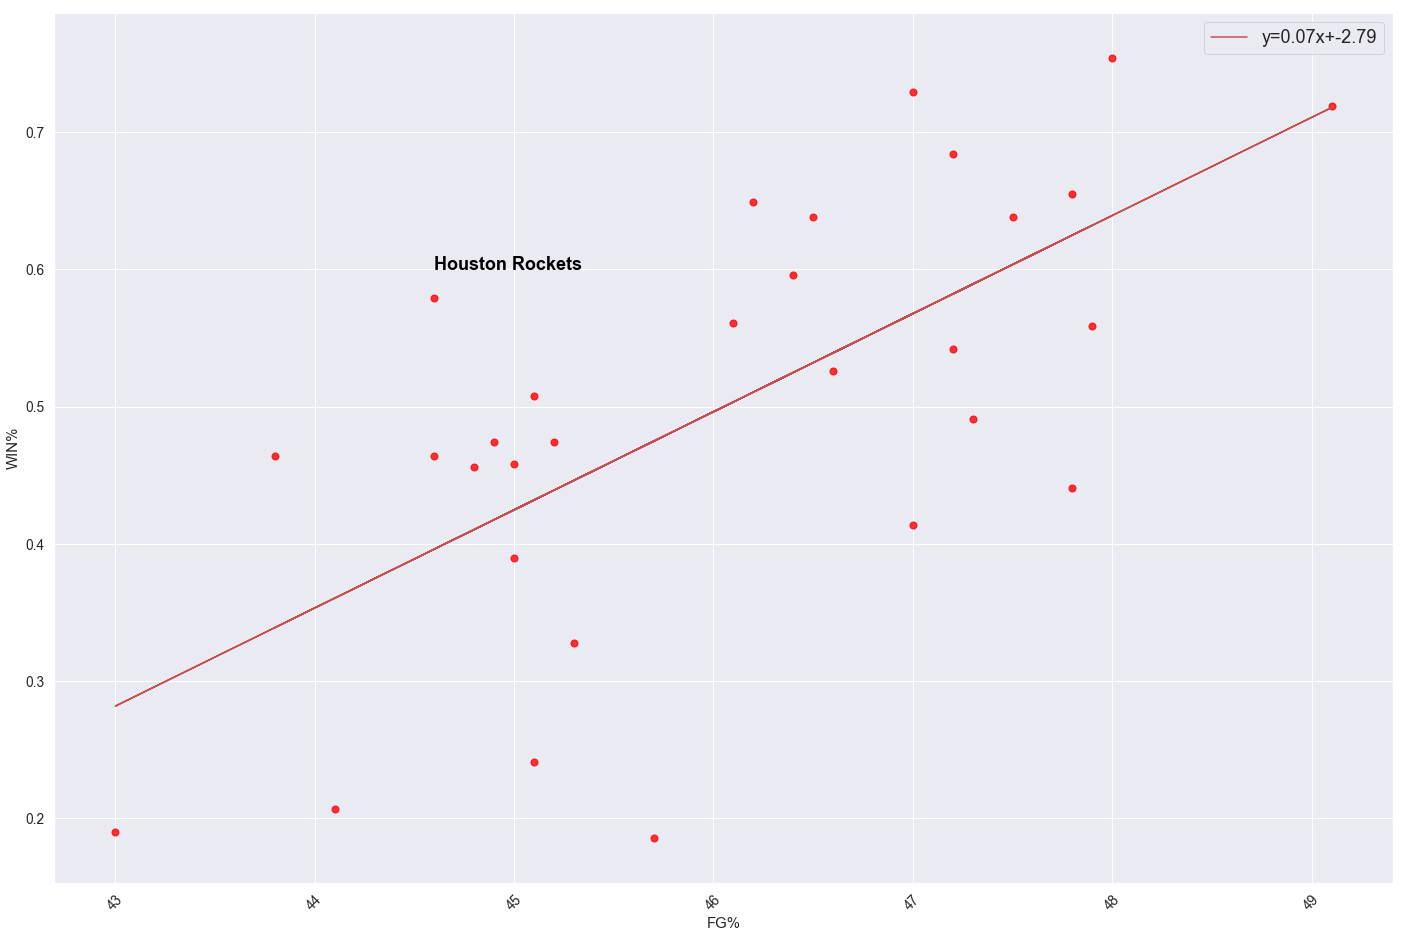

In [26]:
plt.figure(figsize=(24,16))
plt.xticks(rotation=45)
sns.set(font_scale = 1.5)
ax = sns.regplot(data=teamstats, y="WIN%", x="FG%", fit_reg=False, marker='o', color='red', scatter_kws={'s':50})
plt.plot(x_FGPer, line_fgper, 'r', label='y={:.2f}x+{:.2f}'.format(slope_fgper,intercept_fgper))
plt.legend(fontsize=18)
ax.text(44.6, 0.6, "Houston Rockets", horizontalalignment='left', size='medium', color='black', weight='semibold')


Use ```stats.linregress``` api to find the parameters for linear regression for two attributes (DREB and WIN%)

In [22]:
slope_dreb, intercept_dreb, r_value_dreb, p_value_dreb, std_err_dreb = stats.linregress(x_DREB,y)
line_dreb = slope_dreb*x_DREB+intercept_dreb

Plot scattter plot for `WIN% `and `DREB`, and plot the associated line regression on the same plot

Text(31, 0.6, 'Houston Rockets')

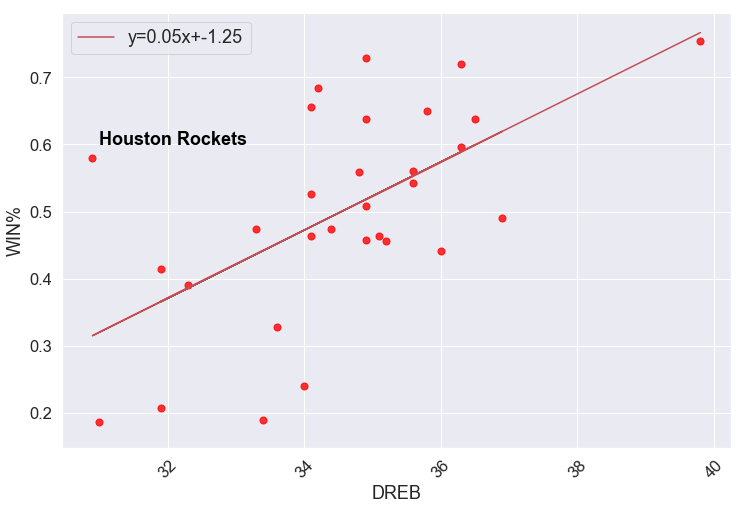

In [26]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.set(font_scale = 1.5)
ax = sns.regplot(data=teamstats, y="WIN%", x="DREB", marker='o', fit_reg=False, color='red', scatter_kws={'s':50})
plt.plot(x_DREB, line_dreb, 'r', label='y={:.2f}x+{:.2f}'.format(slope_dreb,intercept_dreb))
plt.legend(fontsize=18)
ax.text(31, 0.6, "Houston Rockets", horizontalalignment='left', size='medium', color='black', weight='semibold')

In [34]:
y_W = advteam2019['W'].values
y_W

array([43, 43, 41, 39, 38, 37, 37, 37, 34, 33, 33, 32, 32, 30, 30, 28, 27,
       27, 27, 26, 26, 26, 26, 24, 23, 19, 14, 12, 11, 11])

In [35]:
slope_defrtg, intercept_defrtg, r_value_defrtg, p_value_defrtg, std_err_defrtg = stats.linregress(x_DEF,y_W)
line_defrtg = slope_defrtg*x_DEF+intercept_defrtg

From the plot, we can see that defense rating is negatively related to winning, because the better the defense the lower the points allowed for opponens
* Linear regression and plots with attributes `OFFRTG` and `+/-` can be obtained using the similar method

Text(112.2, 33, 'Houston Rockets')

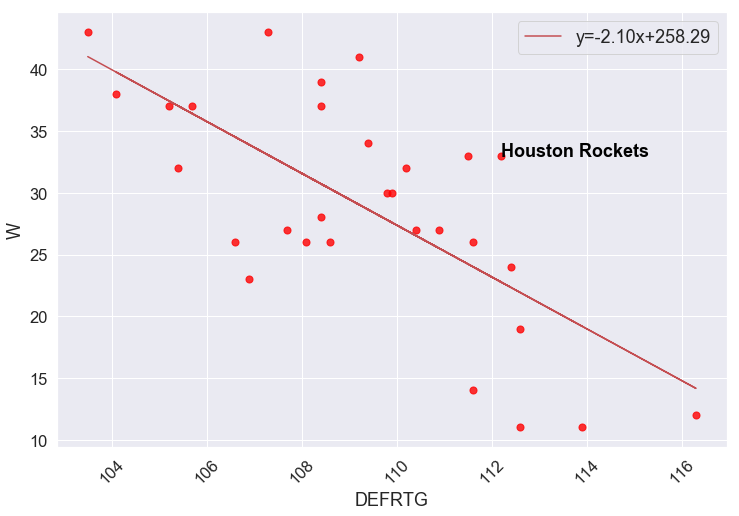

In [36]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.set(font_scale = 1.5)
ax = sns.regplot(data=advteam2019, y="W", x="DEFRTG", marker='o', fit_reg=False, color='red', scatter_kws={'s':50})
plt.plot(x_DEF, line_defrtg, 'r', label='y={:.2f}x+{:.2f}'.format(slope_defrtg,intercept_defrtg))
plt.legend(fontsize=18)
ax.text(112.2, 33, "Houston Rockets", horizontalalignment='left', size='medium', color='black', weight='semibold')

### Alternative way to obtain linear regression function ###

Write a lambda equation to find sum of squares: $$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  ,
which can interpret the scatteredness of dataset

In [17]:
sum_of_squares = lambda θ, x, y: np.sum((y - θ[0] - θ[1]*x) ** 2)

Use the `sum_of_squares` lambda function and `optimize.fmin()` method to find the parameters for linear regression for `FG%`
* The two parameters are identical to the ones obtained with method of `linregress()`
* The rest of the attributes' associated parameters are obtained below and can be obtained with the same method

In [19]:
a0_fgper, a1_fgper = fmin(sum_of_squares, [0,1], args=(x_FGPer,y))
a0_fgper, a1_fgper

Optimization terminated successfully.
         Current function value: 0.398708
         Iterations: 87
         Function evaluations: 158


(-2.7928969611824463, 0.07150234812665299)

Use ```optimize.fmin()``` to obtain the parameters betas (here annotated as ```a```) for linear regression

In [39]:
a0_dreb, a1_dreb = fmin(sum_of_squares, [0,1], args=(x_DREB,y))
a0_dreb, a1_dreb

Optimization terminated successfully.
         Current function value: 0.590074
         Iterations: 31
         Function evaluations: 54


(0.0009303512573242194, 0.014578247070309719)

In [40]:
a0_defrtg, a1_defrtg = fmin(sum_of_squares, [0,1], args=(x_DEF,y_W))
a0_defrtg, a1_defrtg

Optimization terminated successfully.
         Current function value: 1210.878779
         Iterations: 106
         Function evaluations: 204


(258.28496464970647, -2.099106056294766)

Use `statsmodels` and `ols` api to double check the parameters of linear regression against previous results

In [44]:
data = pd.DataFrame({'x': x_DREB, 'y': y})

In [45]:
model = ols("y ~ x", data).fit()

In [46]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     15.68
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           0.000467
Time:                        13:27:07   Log-Likelihood:                 20.130
No. Observations:                  30   AIC:                            -36.26
Df Residuals:                      28   BIC:                            -33.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2515      0.443     -2.825      0.0

### Bayesian Modeling:

<br>


Import pymc3 api, and the Model method and various distribution methods

In [384]:
from pymc3 import Normal, HalfCauchy, Deterministic, Model, HalfNormal

Create a new Model object which is a container for the model random variables

In [ ]:
team_model = pm.Model()

Specified parameters in the Bayesian model `team_model`, where priors for the unknown models parameters which is associated with random variables with normal prior distribution

* In which, for the regression coefficients, with a mean of 0 and standard deviation of 10, and a half-normal distribution for the standard deviation of the observations.
* Most commonly used distributions, such as Beta, Exponential, Categorical, Gamma, Binomial and many others, are available in PyMC3.
* There are 5 attributes from the NBA stats used to train and build the model: `FG%`, `DREB`, `+/-`, `EFG%`,`DEFRTG` and `OFFRTG`. And variables `fgper`, `dreb` etc. are obtained by Python <b>Deterministic() </b>method and used to keep track of the related attributes that they are multiplied to in the Bayesian model function 

In [ ]:

# Create a context manager, with our basic_model as the context, that includes all statements until the indented block ends.
# This means all PyMC3 objects introduced in the indented code block below the `with` statement are added to the model 
# behind the scenes. Without this context manager idiom, we would be forced to manually associate each of the variables 
# with basic_model right after we create them 
with team_model:
    inter = Normal('inter', 0, sd=10)
    slope1 = Normal('slope1', 0, sd=10)
    slope2 = Normal('slope2', 0, sd=10)
    slope3 = Normal('slope3',0,sd = 10)
    slope4 = Normal('slope4',0,sd = 10)
    slope5 = Normal('slope5',0,sd = 10)
    slope6 = Normal('slope6',0,sd = 10)
    fgper = Deterministic('fgper', slope1)
    dreb = Deterministic('dreb', slope2)
    pm = Deterministic('pm', slope3)
    deftng = Deterministic('deftng', slope4)
    offtng = Deterministic('offtng', slope5)
    efgper = Deterministic('efgper', slope6)
    σ = HalfCauchy('σ', 1)
                      
    # The beta variable has an additional shape argument to denote it as a vector-valued parameter of size 2. 
    # The shape argument is available for all distributions and specifies the length or shape of the random variable, 
    # but is optional for scalar variables, since it defaults to a value of one. It can be an integer, to specify an array, 
    # or a tuple, to specify a multidimensional array (e.g. shape=(5,7) makes random variable that takes on 5 by 7 matrix 
    # values)

    # Expected value of outcome: This creates a *deterministic* random variable, which implies that its value is completely 
    # determined by its parents’ values. That is, there is no uncertainty beyond that which is inherent in the parents’ 
    # values. Here, mu is just the sum of the intercept alpha and the two products of the coefficients in beta and the 
    # predictor variables

    # Likelihood (sampling distribution) of observations
    # Y_obs is a stochastic variable that we call an *observed* stochastic, and represents the data likelihood of the model.
    # It is identical to a standard stochastic, except that its observed argument, which passes the data to the variable, 
    # indicates that the values for this variable were *observed*, and should not be changed by any fitting algorithm 
    # applied to the model. The data can be passed in the form of either a numpy.ndarray or pandas.DataFrame object
    #Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

After specifying the context in the `team_model`, we can write the formula to track the posterior `μ` using the parameters, and get the expected value and normal distribution of winning rate

In [57]:
with team_model:
    
    μ = inter + slope1*x_FGPer + slope2*x_DREB + slope3*x_pm + slope4*x_DEF + slope5*x_OFF + slope6*x_EFG
    mu_d = Deterministic('mu_d', μ)
    score = Normal('score', mu=μ, sd=σ, observed=y)

From the api/library pymc3, and use its sample method to obtain posterior estimates for unknown parameters in `team_model`. And this is one of the two methods called **NUTS** (the No U-Turn Sampler).
* In the NUTS method, `nuts_kwargs=dict(target_accept=.90)` is used for tuning data and adjust the target_accept keyword to avoid divergence etc. to obtain a better set of random data according to the `team_model`

In [58]:
from pymc3 import sample

with team_model:

    team_sample = sample(5000, tune=1000, random_seed=RANDOM_SEED,
                         nuts_kwargs=dict(target_accept=.90))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, slope6, slope5, slope4, slope3, slope2, slope1, inter]
Sampling 2 chains: 100%|██████████| 12000/12000 [23:08<00:00,  6.49draws/s] 


Plot the posterior funciton

* There are 30 distribution plots for the 30 NBA teams' winning  rate (expected value, mu_d)
* These plots are accordingly describing the predictive winning rate as expected. (eg. Bucks is the best team now, and as modeled, they have the highest rate of winning)

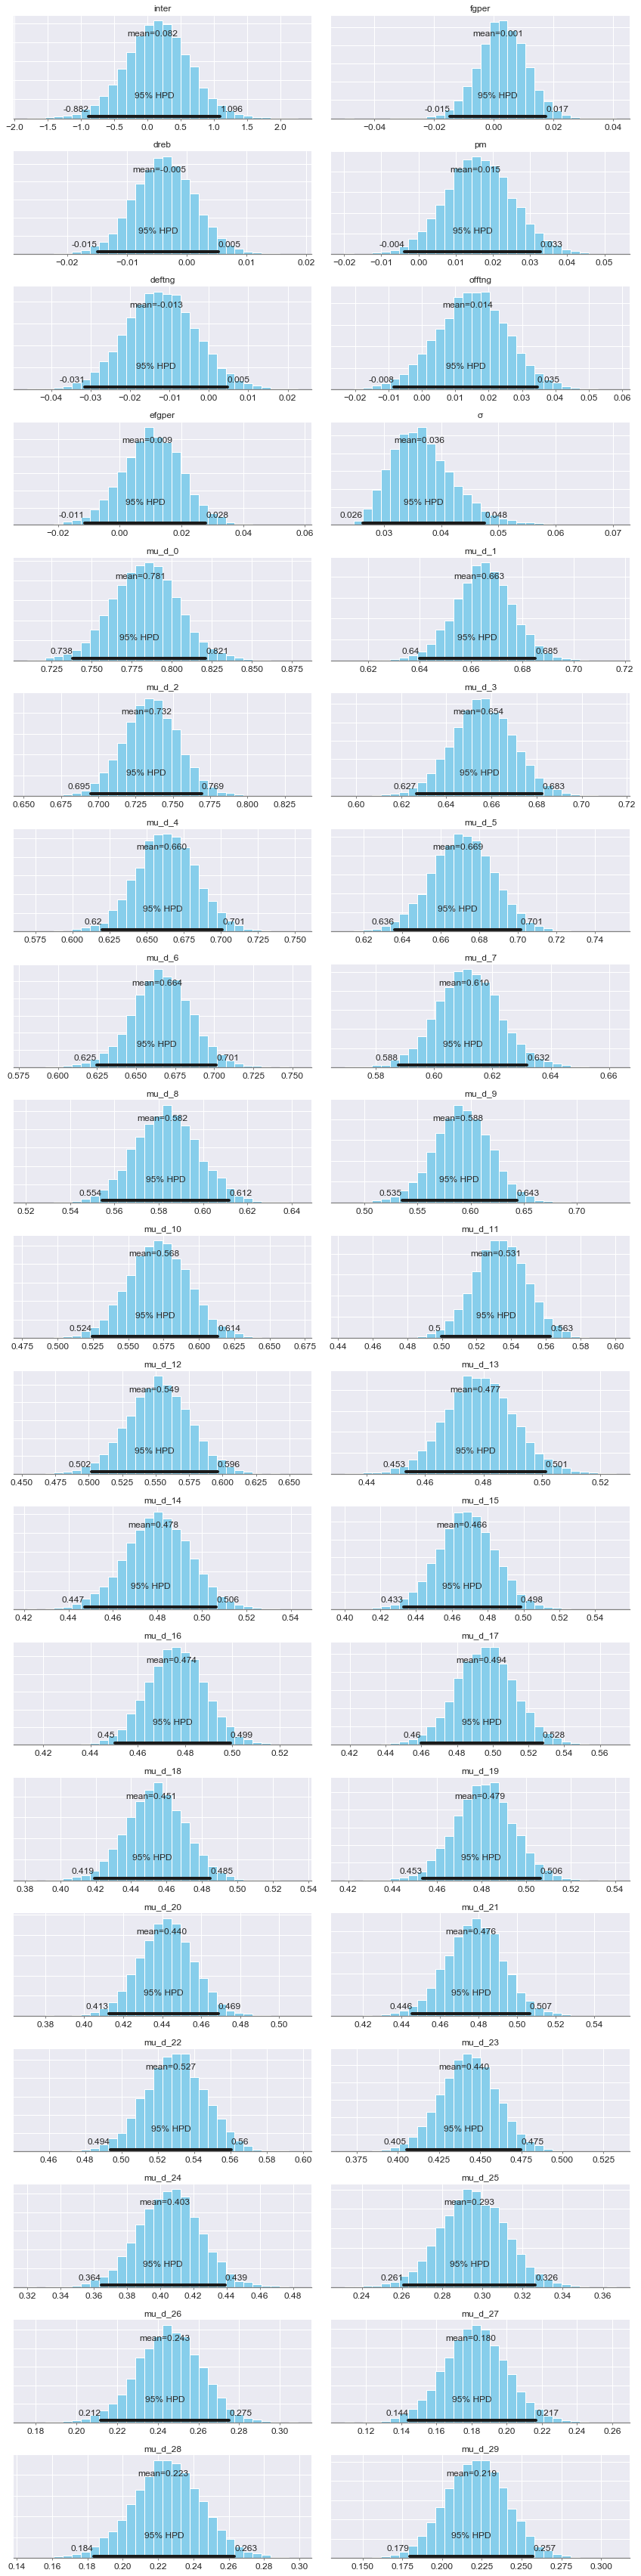

In [60]:
from pymc3 import plot_posterior

plot_posterior(team_sample[500:], varnames=['inter', 'fgper', 'dreb', 'pm', 'deftng','offtng', 'efgper', 'σ', 'mu_d']);

Use `sample_ppc` from pymc3 to generate 6000 simulated data as testing set for the `team_model` to check if this model fits

Sampling from the **posterior predictive distribution** is straighforward in PyMC3. The `sample_ppc` function draws posterior predictive checks from all of the data likelihoods. 

In [61]:
from pymc3 import sample_ppc

with team_model:
    
    team_ppc = sample_ppc(team_sample, 6000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """
100%|██████████| 6000/6000 [00:07<00:00, 752.25it/s] 


In [62]:
team_ppc['score'].shape

(6000, 30)

Plot 15 histograms for those 6000 simulation for 30 teams
* By estimating these distribution plots, about 12 out of 15 posterior distributions are showing that the posterior estimates and the `team_model` genearally fit the prediction that this Bayesian model drives，and so they are in a good fit!

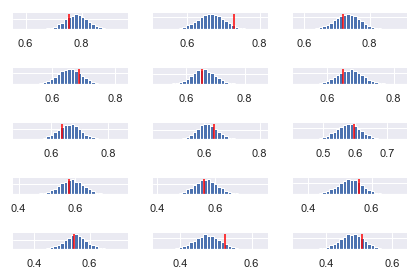

In [67]:
fig, axes = plt.subplots(5, 3)
axes_flat = axes.flatten()

for ax, real_data, sim_data in zip(axes_flat[:], y, team_ppc['score'].T):
    ax.hist(sim_data, bins=30)
    ax.vlines(real_data, *ax.get_ylim(), colors='red')
    ax.set_yticklabels([])
    sns.despine(left=True)

#axes_flat[-1].axis('off')
plt.tight_layout()

Collect the variables (as `drebs`, `fgpers`, etc.) we set earlier to track the unknown parameters in finding the posterior μ for Bayesian model
* Use these lists of parameters to drive the winning rate `win_samples` using a normal distribution function with random data generated

In [217]:
drebs = team_sample['dreb']
fgpers = team_sample['fgper']
inters = team_sample['inter']
pms = team_sample['pm']
deftngs = team_sample['deftng']
offtngs = team_sample['offtng']
efgpers = team_sample['efgper']
sigs = team_sample['σ']
win_samples = Normal.dist(inters + fgpers + drebs + pms + deftngs+offtngs + efgpers, sigs).random()

In [218]:
len(win_samples)

10000

Estimates the probability of NBA teams having a WIN% of over 50%, meaning that, based on the `team_model`, there are about <b>19.9%</b> of the 30 NBA teams can end up with 50% WIN%

In [219]:
(win_samples > 0.5).mean()

0.1991

The following few blocks of code are to adjust the variables in distribution function for `win_samples` associated to the value of attributes in `team_model` in order to increase the probability of having WIN% over 50%
* Decrease defense rating by 20% (because the better the defense the lower the rating, i.e. the points allowed for opponens)
* Increase effective field goal percentage and defense rebound by 20%, meaning that the teams execute more efficient offense, maintain better shot selections and grabbing more defensive rebound in the NBA game

In [75]:
better_deftngs = deftngs * 0.8
deftngs

array([-0.01922625, -0.01010524, -0.01425528, ..., -0.01215418,
       -0.00431466, -0.00490618])

In [76]:
higher_drebs = drebs * 1.2
higher_drebs

array([-0.00498087, -0.0067464 , -0.0036609 , ..., -0.00599242,
       -0.00740135, -0.00634444])

In [77]:
higher_efgpers = efgpers * 1.2

Apply the adjusted attributes to the function to get new winning rate distribution `new_win_samples`

In [134]:
new_win_samples = Normal.dist(inters + fgpers + higher_drebs + pms + better_deftngs + offtngs + higher_efgpers, sigs).random()


Inspecting `new_win_samples`, the winning rate (of teams having WIN% over 50%) increase by more than <b>0.5% to 20.5%</b>

In [135]:
(new_win_samples > 0.5).mean()

0.205

With the same logic, if teams play much worse defense in the game (value of defense rating increased by 40%) and grabing less defensive rebound (also account for bad defense) and taking inefficient shots(lower effective field goal percentage by 20%), the winning rate (of teams having WIN% over 50%) decreased almost 0.4% to 19.58%

In [381]:
worse_deftngs = deftngs * 1.4
lower_drebs = drebs * 0.8
lower_efgpers = efgpers*0.8
new_win_samples2 = Normal.dist(inters + fgpers + lower_drebs + pms + worse_deftngs + offtngs + lower_efgpers, sigs).random()

In [382]:
(new_win_samples2 > 0.5).mean()

0.1958

### Conclusions ###

* To result in better team winning rate, attributes/execution of `EFG%`, `DREB`, `DEFRTG`, `OFFRTG`, `+/-` and `FG%` are the key for gameplay execution during the NBA game.
* More specifically, maintaining better and more efficient shot selection(higher `EFG%`), better defense (more defensive rebound `DREB`, less oppenents' point allowed `DEFRTG`), and/or better offense (Offense rating `OFFRTG`, points deficit `+/-` and better shot selection and efficiency `FG%`) can help the team win more game and increase the `WIN%` 